In [8]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import talib
from pathlib import Path
import os

# Set plot style (Safe way)
sns.set_theme(style="darkgrid", palette="viridis")

print("Libraries imported successfully!")


Libraries imported successfully!


In [13]:
# Cell 2: Set Up Project Paths
# Define project paths
BASE_DIR = Path(r'C:\Users\yusuf\Desktop\10Academy\week_1\Predicting-Stock-Price')  # Project root
DATA_DIR = Path(r'C:\Users\yusuf\Desktop\10Academy\week_1\Predicting-Stock-Price\data')  # Data directory
ASSETS_DIR = BASE_DIR / 'assets' / 'task2'
NOTEBOOKS_DIR = BASE_DIR / 'notebooks' / 'task2'
TASK1_ASSETS_DIR = BASE_DIR / 'assets' / 'task1'
TASK1_NOTEBOOKS_DIR = BASE_DIR / 'notebooks' / 'task1'

# Create directories if they don't exist
for dir_path in [BASE_DIR, DATA_DIR, ASSETS_DIR, NOTEBOOKS_DIR, TASK1_ASSETS_DIR, TASK1_NOTEBOOKS_DIR]:
    dir_path.mkdir(parents=True, exist_ok=True)

# Verify directories
for dir_path, name in [(BASE_DIR, 'Project'), (DATA_DIR, 'Data'), (ASSETS_DIR, 'Task 2 Assets'), (NOTEBOOKS_DIR, 'Task 2 Notebooks'), (TASK1_ASSETS_DIR, 'Task 1 Assets'), (TASK1_NOTEBOOKS_DIR, 'Task 1 Notebooks')]:
    if not dir_path.exists():
        raise FileNotFoundError(f"{name} directory {dir_path} does not exist.")
    print(f"{name} directory: {dir_path}")

Project directory: C:\Users\yusuf\Desktop\10Academy\week_1\Predicting-Stock-Price
Data directory: C:\Users\yusuf\Desktop\10Academy\week_1\Predicting-Stock-Price\data
Task 2 Assets directory: C:\Users\yusuf\Desktop\10Academy\week_1\Predicting-Stock-Price\assets\task2
Task 2 Notebooks directory: C:\Users\yusuf\Desktop\10Academy\week_1\Predicting-Stock-Price\notebooks\task2
Task 1 Assets directory: C:\Users\yusuf\Desktop\10Academy\week_1\Predicting-Stock-Price\assets\task1
Task 1 Notebooks directory: C:\Users\yusuf\Desktop\10Academy\week_1\Predicting-Stock-Price\notebooks\task1


In [14]:
# Cell 3: Initialize Project Structure
# Create project structure as specified
structure = {
    BASE_DIR / '.vscode': ['settings.json'],
    BASE_DIR / '.github' / 'workflows': ['unittests.yml'],
    BASE_DIR: ['.gitignore', 'requirements.txt', 'README.md'],
    BASE_DIR / 'src': ['__init__.py'],
    BASE_DIR / 'notebooks': ['__init__.py', 'README.md'],
    BASE_DIR / 'notebooks' / 'task1': [],
    BASE_DIR / 'notebooks' / 'task2': ['task2_quantitative_analysis.ipynb'],
    BASE_DIR / 'tests': ['__init__.py'],
    BASE_DIR / 'scripts': ['__init__.py', 'README.md']
}

# Create directories and files
for dir_path, files in structure.items():
    dir_path.mkdir(parents=True, exist_ok=True)
    for file_name in files:
        file_path = dir_path / file_name
        if not file_path.exists():
            file_path.touch()
            print(f"Created {file_path}")

# Update requirements.txt
requirements_content = """pandas==2.0.3
numpy==1.24.3
matplotlib==3.7.1
seaborn==0.12.2
yfinance==0.2.31
ta-lib==0.4.24
"""
with open(BASE_DIR / 'requirements.txt', 'w') as f:
    f.write(requirements_content)
print("Updated requirements.txt")

# Update .gitignore to exclude data and solar-dashboard directories
gitignore_content = """__pycache__/
*.pyc
*.ipynb_checkpoints
.DS_Store
data/
venv/
.env
solar-dashboard/
"""
with open(BASE_DIR / '.gitignore', 'w') as f:
    f.write(gitignore_content)
print("Updated .gitignore")

# Update README.md with project description
readme_content = """# Predicting Stock Price Movements
This repository contains the code and assets for the 10 Academy Week 1 Challenge: Predicting Stock Price Movements.

## Structure
- `.vscode/`: IDE settings
- `.github/workflows/`: CI/CD workflows
- `src/`: Source code
- `notebooks/`: Jupyter Notebooks for analysis
  - `task1/`: Task 1 (EDA)
  - `task2/`: Task 2 (Quantitative Analysis)
- `tests/`: Unit tests
- `scripts/`: Utility scripts
- `assets/`: Visualizations and other outputs
  - `task1/`: Task 1 plots
  - `task2/`: Task 2 plots
"""
with open(BASE_DIR / 'README.md', 'w') as f:
    f.write(readme_content)
print("Updated README.md")

# Update notebooks/README.md
notebooks_readme_content = """# Notebooks
This directory contains Jupyter Notebooks for exploratory data analysis and quantitative analysis.

- `task1/task1_eda.ipynb`: Exploratory Data Analysis (Task 1)
- `task2/task2_quantitative_analysis.ipynb`: Quantitative Technical Analysis (Task 2)
"""
with open(BASE_DIR / 'notebooks' / 'README.md', 'w') as f:
    f.write(notebooks_readme_content)
print("Updated notebooks/README.md")

# Update scripts/README.md
scripts_readme_content = """# Scripts
This directory contains utility scripts for the project.
"""
with open(BASE_DIR / 'scripts' / 'README.md', 'w') as f:
    f.write(scripts_readme_content)
print("Updated scripts/README.md")

# Update .vscode/settings.json
vscode_settings_content = """{
    "python.pythonPath": "C:\\Users\\yusuf\\anaconda3\\envs\\taenv\\python.exe"
}
"""
with open(BASE_DIR / '.vscode' / 'settings.json', 'w') as f:
    f.write(vscode_settings_content)
print("Updated .vscode/settings.json")

# Update .github/workflows/unittests.yml
workflow_content = """name: Unit Tests
on:
  push:
    branches:
      - main
      - task-*
jobs:
  test:
    runs-on: ubuntu-latest
    steps:
      - uses: actions/checkout@v3
      - name: Set up Python
        uses: actions/setup-python@v4
        with:
          python-version: '3.9'
      - name: Install dependencies
        run: |
          python -m pip install --upgrade pip
          pip install -r requirements.txt
      - name: Run tests
        run: |
          python -m unittest discover -s tests
"""
with open(BASE_DIR / '.github' / 'workflows' / 'unittests.yml', 'w') as f:
    f.write(workflow_content)
print("Updated .github/workflows/unittests.yml")

# Verify notebook exists
notebook_path = BASE_DIR / 'notebooks' / 'task2' / 'task2_quantitative_analysis.ipynb'
if not notebook_path.exists():
    print(f"Warning: {notebook_path} does not exist. Please save the notebook before running Git operations.")
else:
    print(f"Verified: {notebook_path} exists.")

Updated requirements.txt
Updated .gitignore
Updated README.md
Updated notebooks/README.md
Updated scripts/README.md
Updated .vscode/settings.json
Updated .github/workflows/unittests.yml
Verified: C:\Users\yusuf\Desktop\10Academy\week_1\Predicting-Stock-Price\notebooks\task2\task2_quantitative_analysis.ipynb exists.


In [15]:
# Cell 4: Load Stock Price Data
# List of stock symbols
stocks = ['AAPL', 'AMZN', 'GOOG', 'META', 'MSFT', 'NVDA', 'TSLA']

# Dictionary to store DataFrames
stock_data = {}

# Load each stock's historical data
for symbol in stocks:
    file_path = DATA_DIR / f'{symbol}_historical_data.csv'
    if file_path.exists():
        try:
            df = pd.read_csv(file_path)
            df['Date'] = pd.to_datetime(df['Date'], format='mixed', errors='coerce')
            df = df.dropna(subset=['Date']).set_index('Date')
            required_cols = ['Open', 'High', 'Low', 'Close', 'Volume']
            if all(col in df.columns for col in required_cols):
                stock_data[symbol] = df
                print(f"Loaded {symbol} data: {df.shape}")
            else:
                print(f"Skipping {symbol}: Missing required columns {set(required_cols) - set(df.columns)}")
        except Exception as e:
            print(f"Error loading {symbol} CSV: {e}")
    else:
        print(f"File {file_path} not found")

# Example: Display AAPL head
if 'AAPL' in stock_data:
    print("\nAAPL Data Sample:")
    display(stock_data['AAPL'].head())
else:
    print("Warning: AAPL data not loaded. Check file availability and format.")

Loaded AAPL data: (10998, 8)
Loaded AMZN data: (6846, 8)
Loaded GOOG data: (5020, 8)
Loaded META data: (2926, 8)
Loaded MSFT data: (9672, 8)
Loaded NVDA data: (6421, 8)
Loaded TSLA data: (3545, 8)

AAPL Data Sample:


,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
Date,,,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.098943,469033600,0.0,0.0
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093781,175884800,0.0,0.0
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.086898,105728000,0.0,0.0
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089049,86441600,0.0,0.0
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091630,73449600,0.0,0.0


In [16]:
# Cell 5: Calculate Technical Indicators with TA-Lib
# Function to calculate technical indicators
def calculate_technical_indicators(df):
    # Moving Averages
    df['SMA_20'] = talib.SMA(df['Close'], timeperiod=20)  # 20-day Simple Moving Average
    df['EMA_20'] = talib.EMA(df['Close'], timeperiod=20)  # 20-day Exponential Moving Average
    
    # Relative Strength Index (RSI)
    df['RSI_14'] = talib.RSI(df['Close'], timeperiod=14)  # 14-day RSI
    
    # Moving Average Convergence Divergence (MACD)
    df['MACD'], df['MACD_Signal'], df['MACD_Hist'] = talib.MACD(
        df['Close'], fastperiod=12, slowperiod=26, signalperiod=9
    )
    
    return df

# Apply indicators to each stock
for symbol in stock_data:
    stock_data[symbol] = calculate_technical_indicators(stock_data[symbol])
    print(f"Calculated technical indicators for {symbol}")

Calculated technical indicators for AAPL
Calculated technical indicators for AMZN
Calculated technical indicators for GOOG
Calculated technical indicators for META
Calculated technical indicators for MSFT
Calculated technical indicators for NVDA
Calculated technical indicators for TSLA


Generating technical indicator plots for AAPL


C:\Users\yusuf\AppData\Local\Temp\ipykernel_7720\275948239.py:34: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
C:\Users\yusuf\AppData\Local\Temp\ipykernel_7720\275948239.py:35: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(ASSETS_DIR / f'{symbol}_technical_indicators.png')
C:\Users\yusuf\anaconda3\envs\taenv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


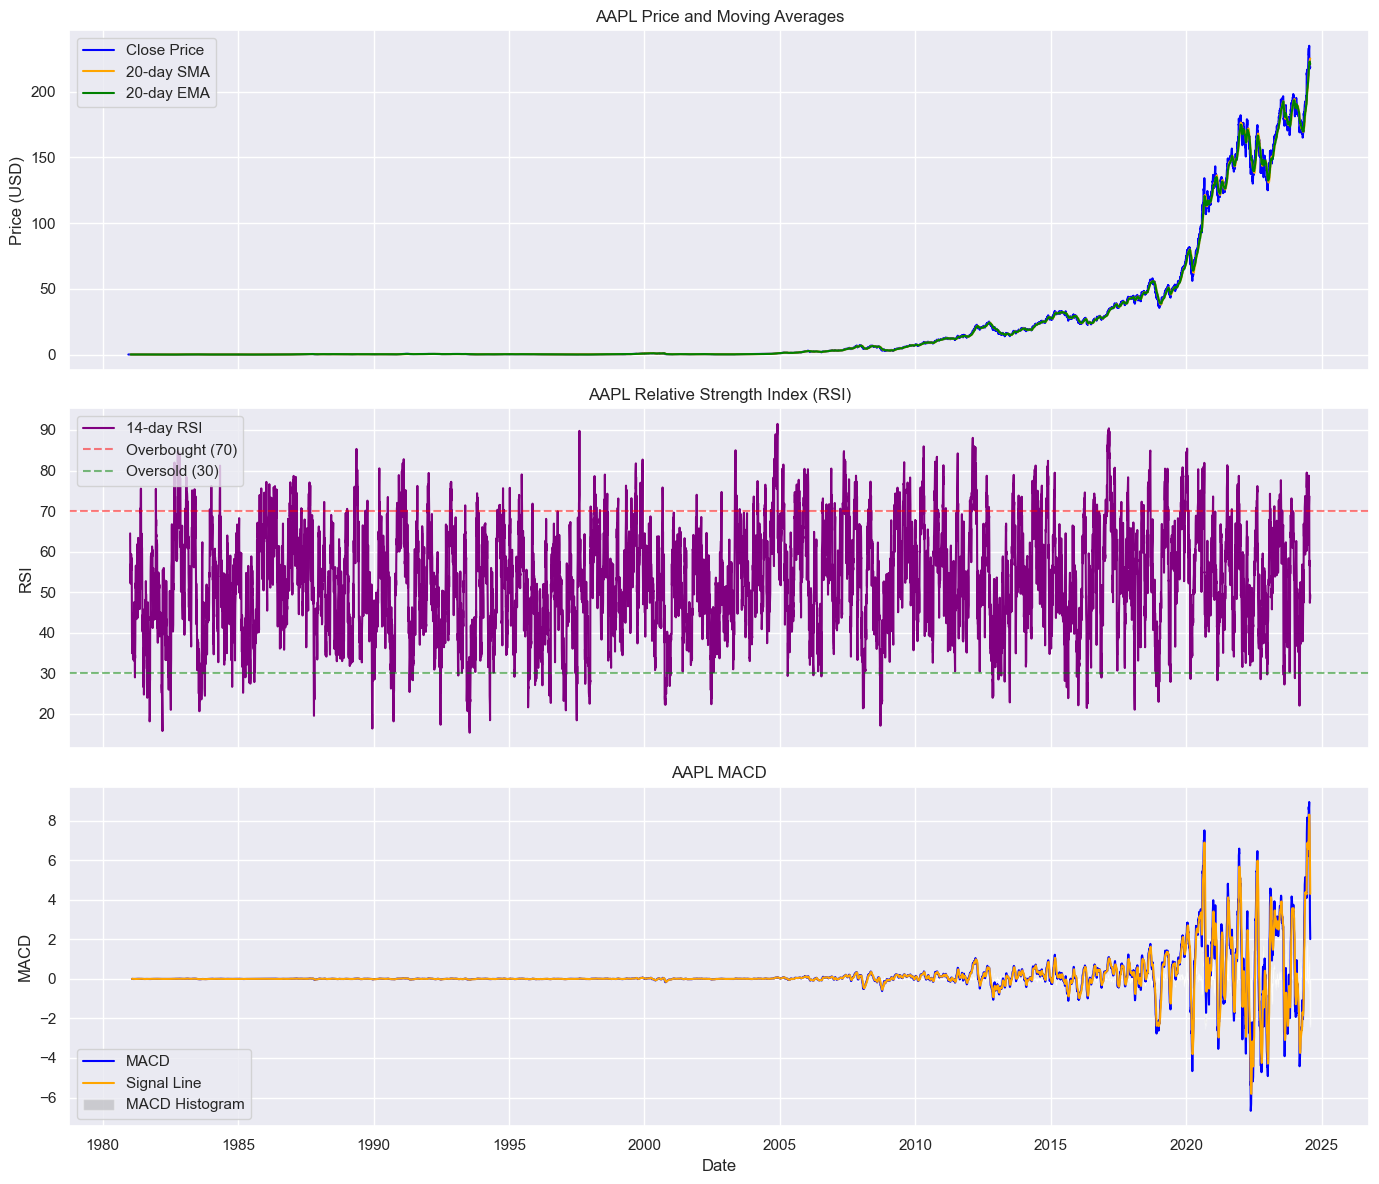

Generating technical indicator plots for AMZN


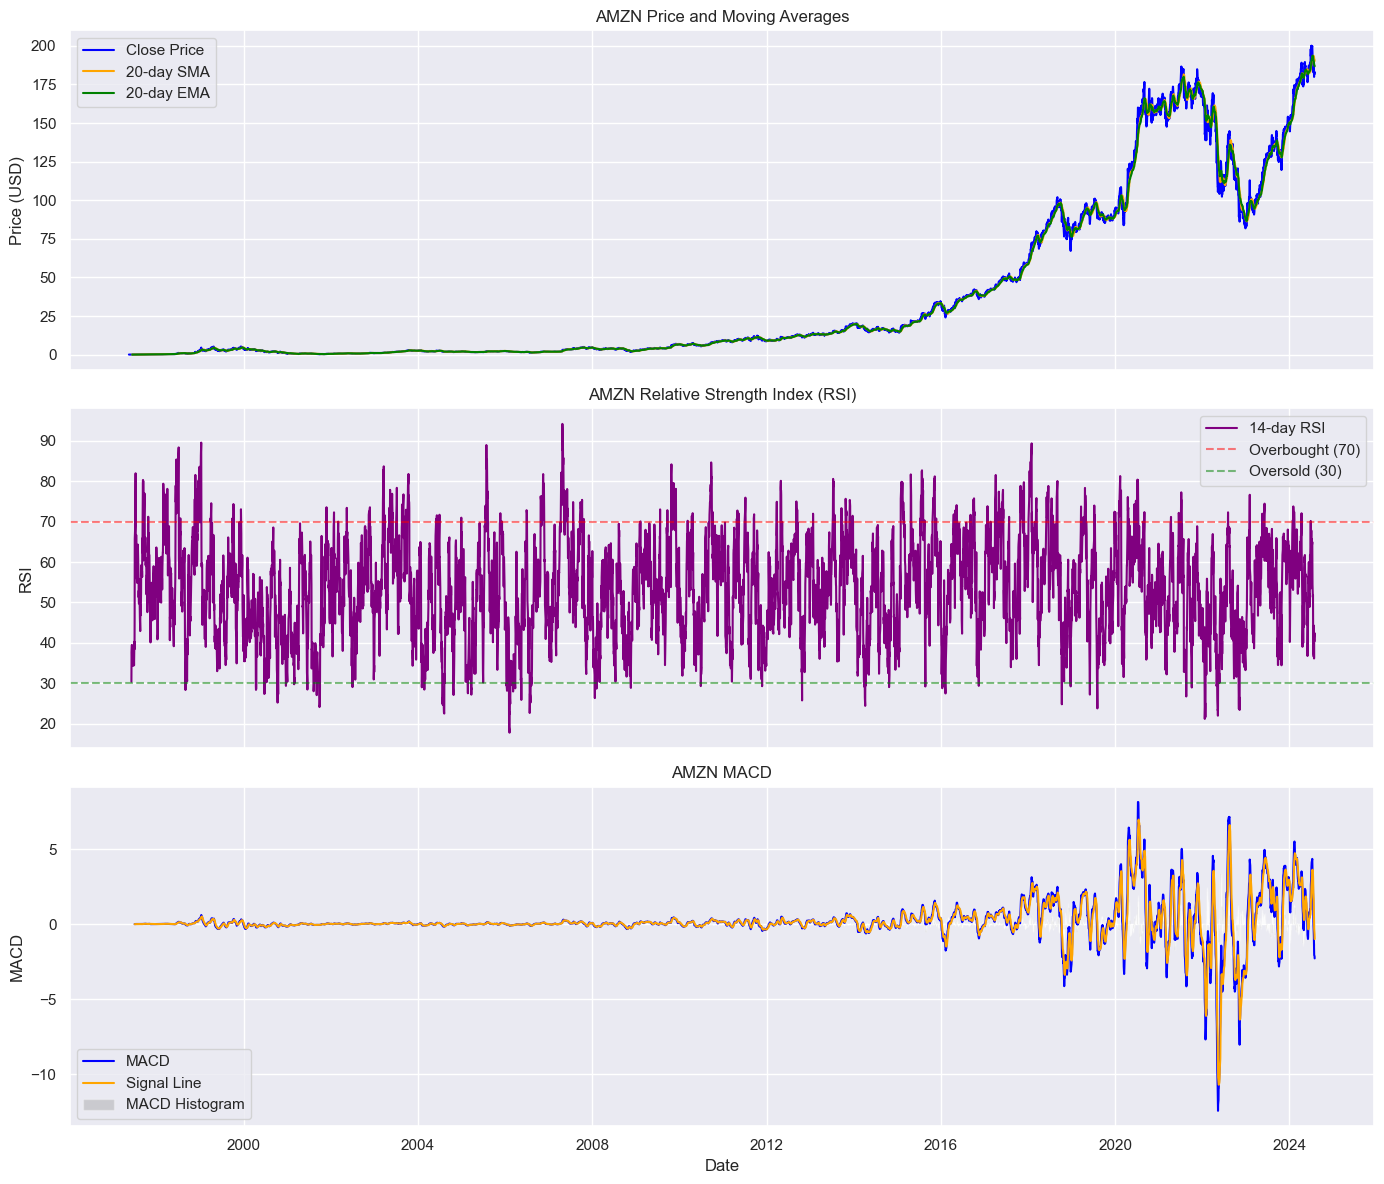

Generating technical indicator plots for GOOG


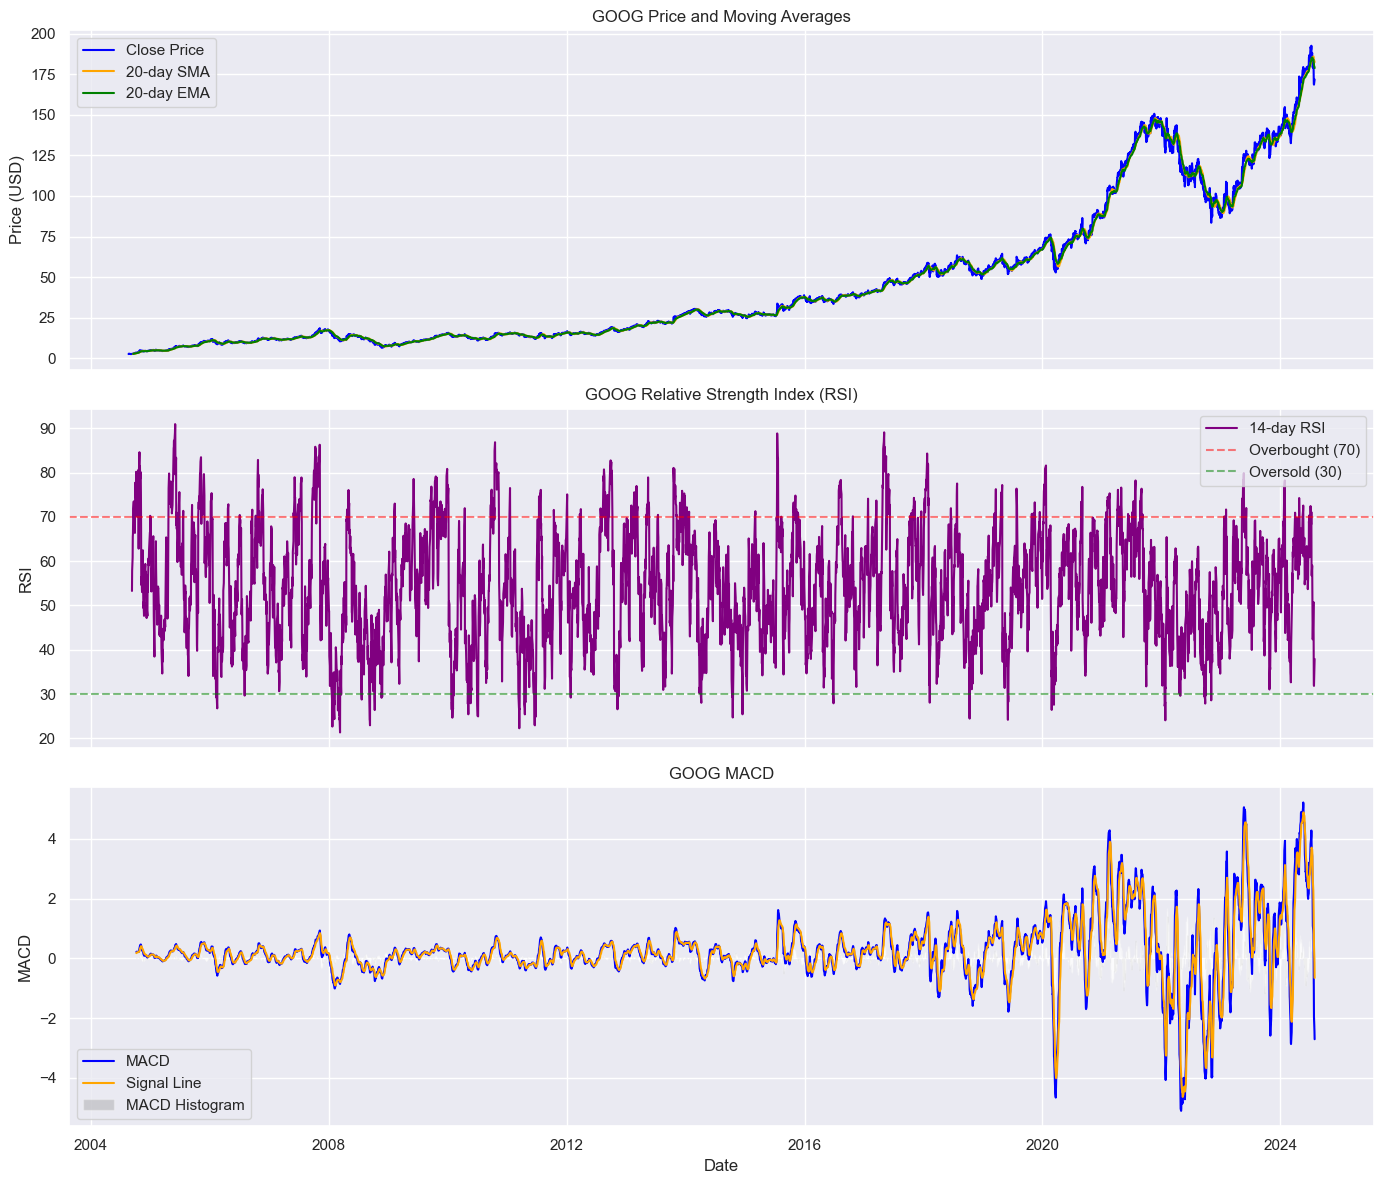

Generating technical indicator plots for META


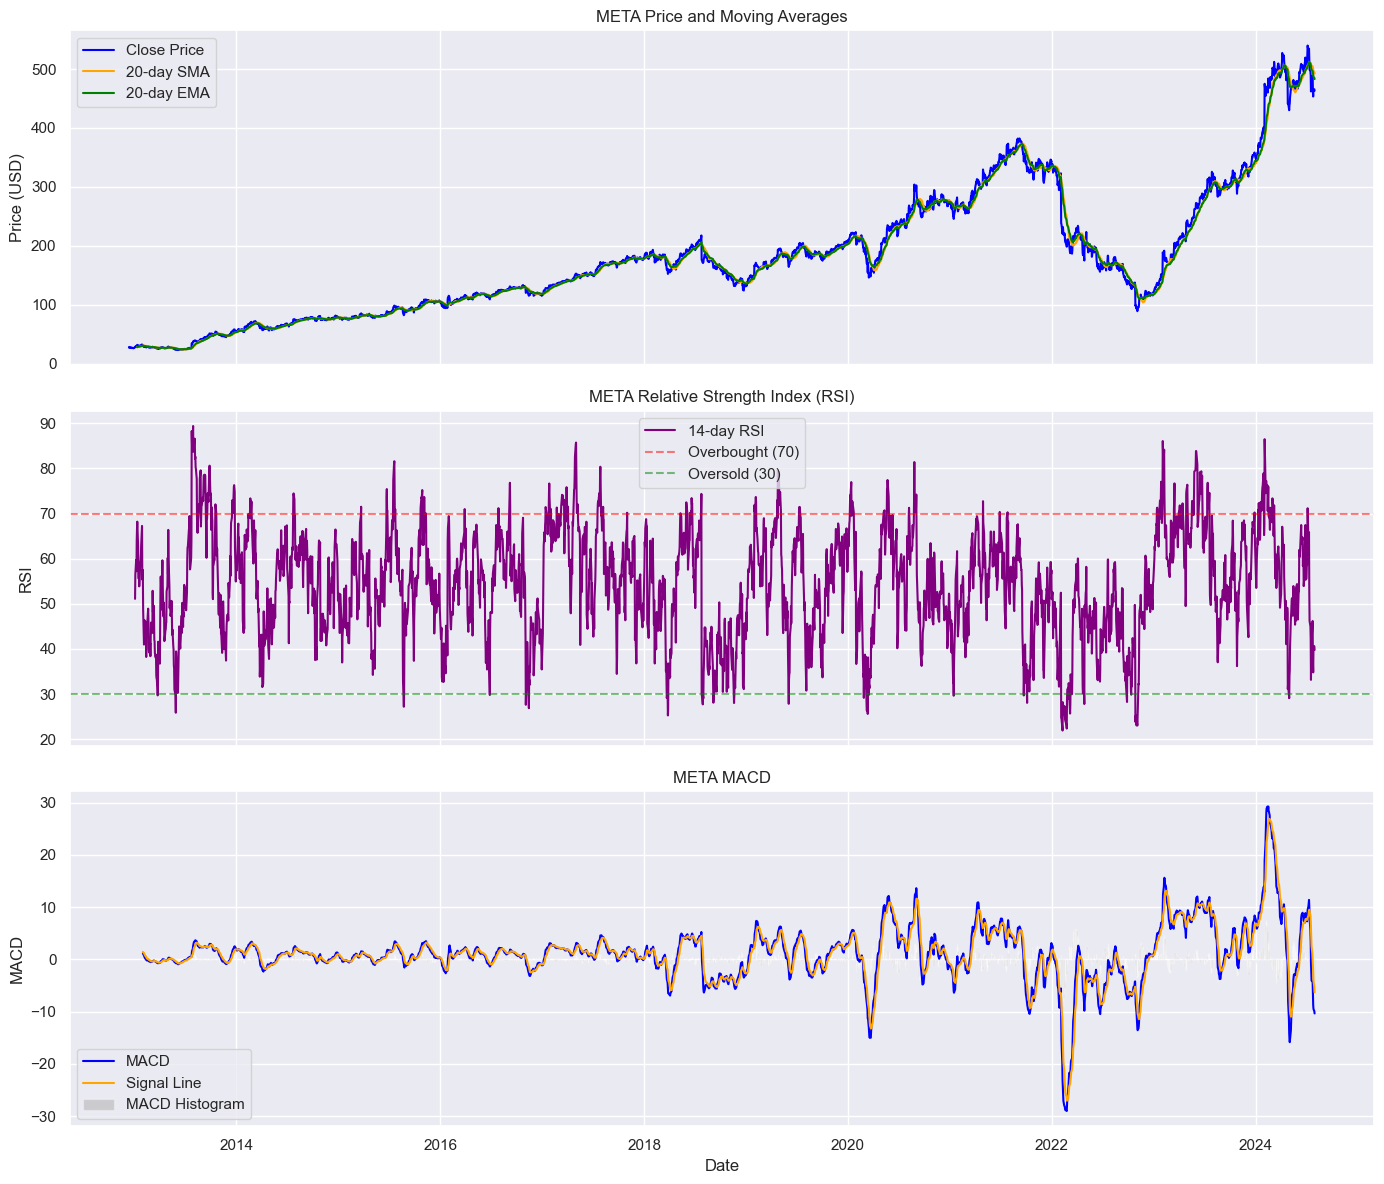

Generating technical indicator plots for MSFT


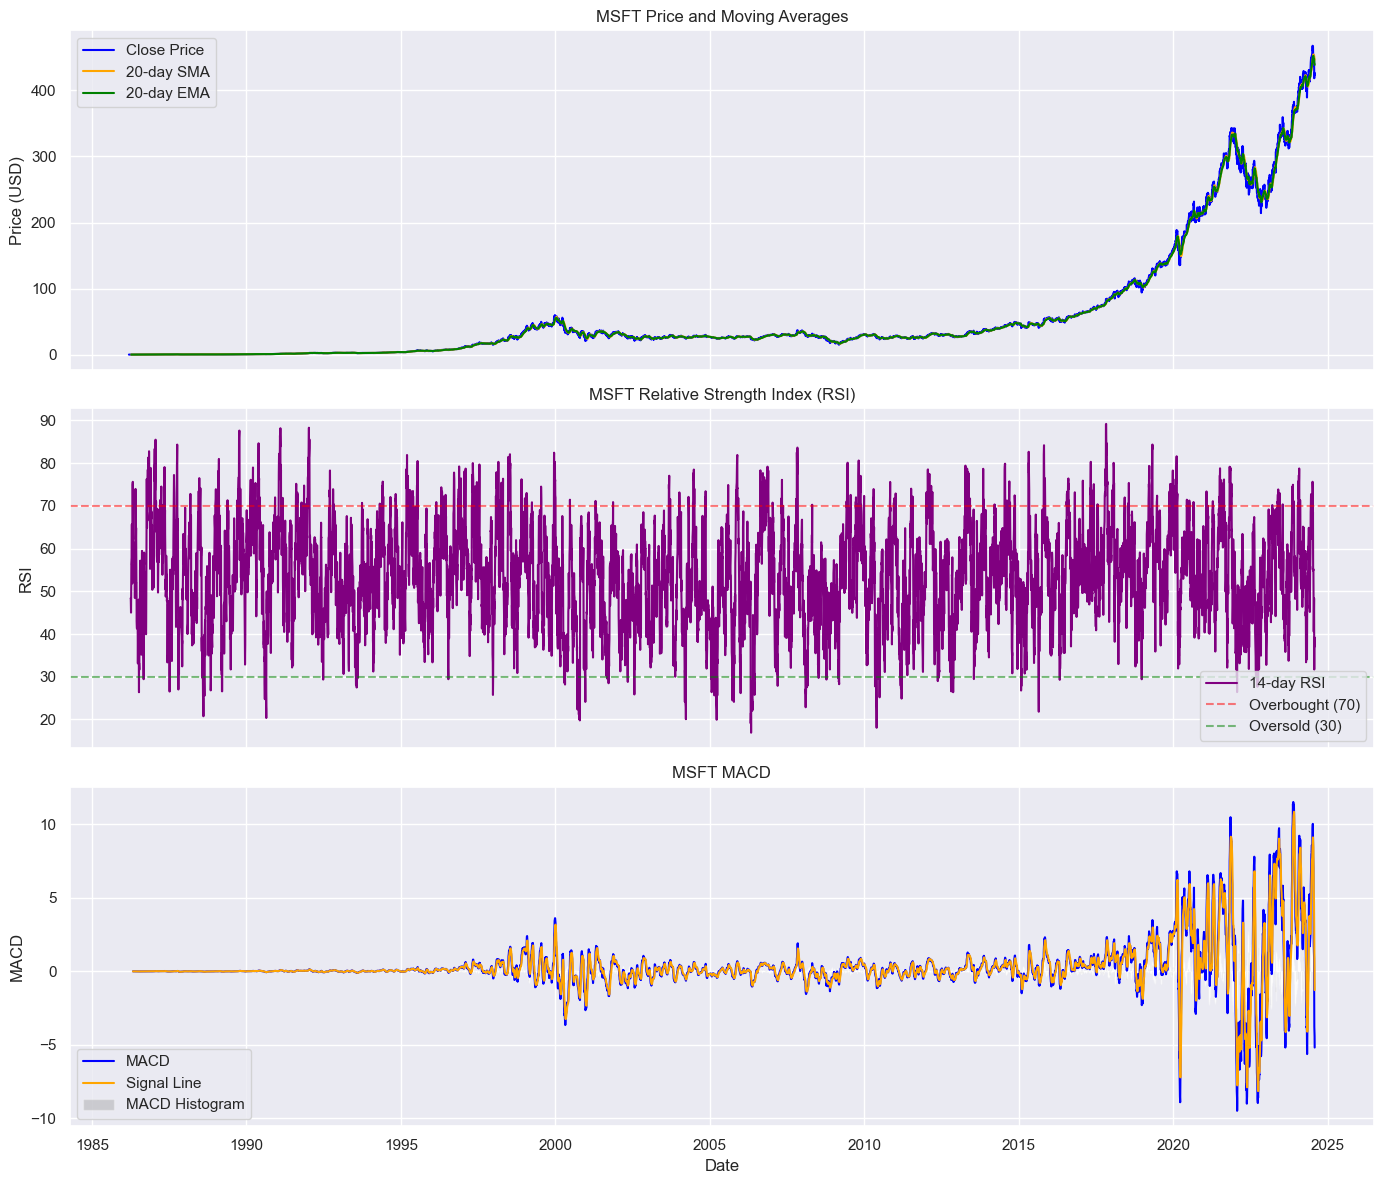

Generating technical indicator plots for NVDA


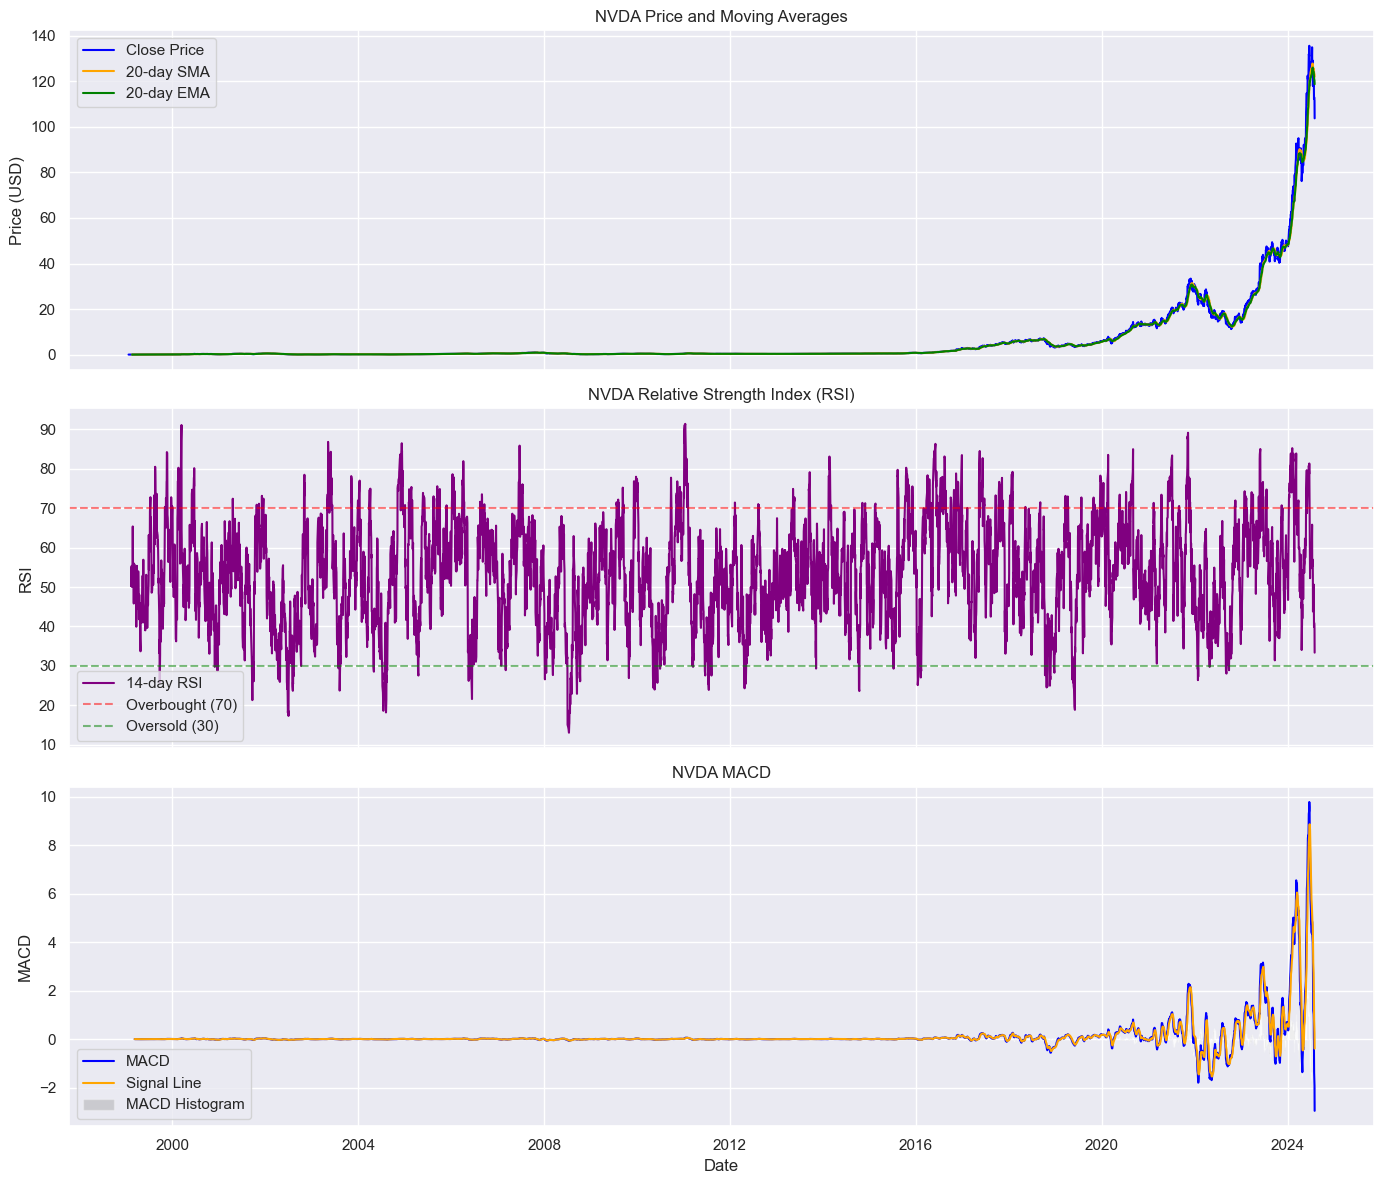

Generating technical indicator plots for TSLA


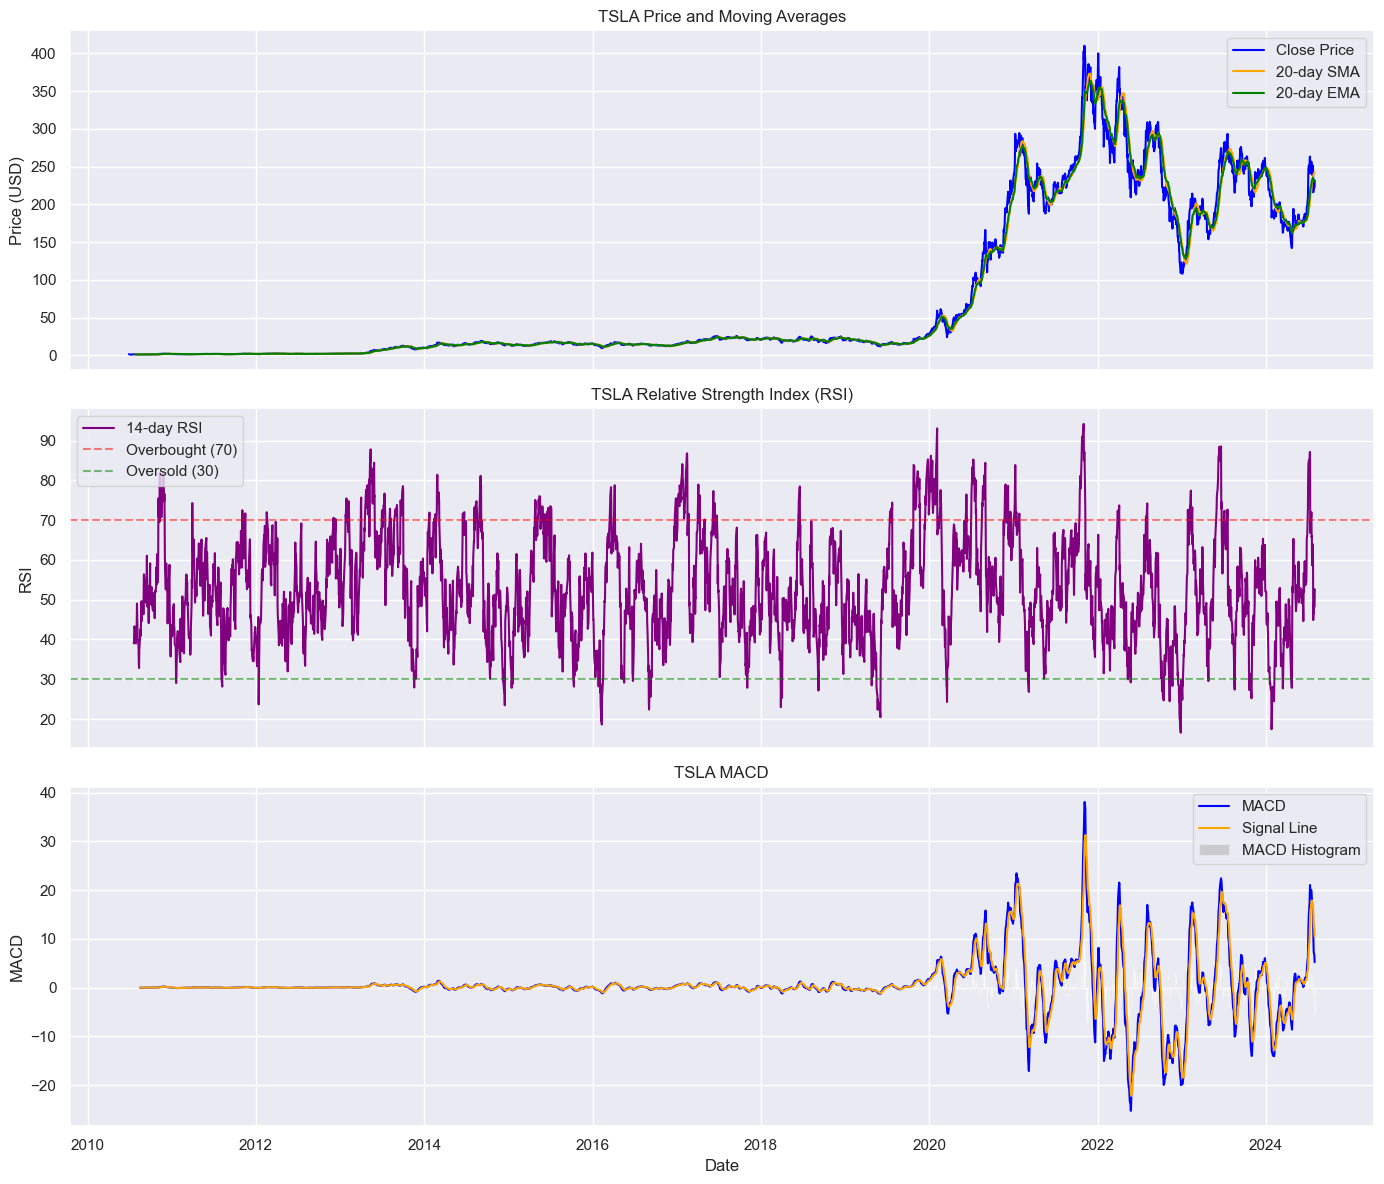

In [17]:
# Cell 6: Visualize Technical Indicators (All Stocks)
# Plot function for technical indicators
def plot_technical_indicators(symbol, df):
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(14, 12), sharex=True)
    
    # Plot Close Price and Moving Averages
    ax1.plot(df.index, df['Close'], label='Close Price', color='blue')
    ax1.plot(df.index, df['SMA_20'], label='20-day SMA', color='orange')
    ax1.plot(df.index, df['EMA_20'], label='20-day EMA', color='green')
    ax1.set_title(f'{symbol} Price and Moving Averages')
    ax1.set_ylabel('Price (USD)')
    ax1.legend()
    ax1.grid(True)
    
    # Plot RSI
    ax2.plot(df.index, df['RSI_14'], label='14-day RSI', color='purple')
    ax2.axhline(70, color='red', linestyle='--', alpha=0.5, label='Overbought (70)')
    ax2.axhline(30, color='green', linestyle='--', alpha=0.5, label='Oversold (30)')
    ax2.set_title(f'{symbol} Relative Strength Index (RSI)')
    ax2.set_ylabel('RSI')
    ax2.legend()
    ax2.grid(True)
    
    # Plot MACD
    ax3.plot(df.index, df['MACD'], label='MACD', color='blue')
    ax3.plot(df.index, df['MACD_Signal'], label='Signal Line', color='orange')
    ax3.bar(df.index, df['MACD_Hist'], label='MACD Histogram', color='gray', alpha=0.3)
    ax3.set_title(f'{symbol} MACD')
    ax3.set_ylabel('MACD')
    ax3.legend()
    ax3.grid(True)
    
    plt.xlabel('Date')
    plt.tight_layout()
    plt.savefig(ASSETS_DIR / f'{symbol}_technical_indicators.png')
    plt.show()

# Plot for all stocks
for symbol in stock_data:
    print(f"Generating technical indicator plots for {symbol}")
    plot_technical_indicators(symbol, stock_data[symbol])

In [18]:
# Cell 7: Calculate Basic Financial Metrics
# Function to calculate financial metrics
def calculate_financial_metrics(df):
    # Daily Returns
    df['Daily_Return'] = df['Close'].pct_change() * 100  # Percentage change
    
    # Volatility (30-day rolling standard deviation of returns)
    df['Volatility'] = df['Daily_Return'].rolling(window=30).std() * np.sqrt(252)  # Annualized
    
    return df

# Apply financial metrics to each stock
for symbol in stock_data:
    stock_data[symbol] = calculate_financial_metrics(stock_data[symbol])
    print(f"Calculated financial metrics for {symbol}")

# Display financial metrics for all stocks
for symbol in stock_data:
    print(f"\n{symbol} Financial Metrics Sample:")
    display(stock_data[symbol][['Daily_Return', 'Volatility']].tail())

Calculated financial metrics for AAPL
Calculated financial metrics for AMZN
Calculated financial metrics for GOOG
Calculated financial metrics for META
Calculated financial metrics for MSFT
Calculated financial metrics for NVDA
Calculated financial metrics for TSLA

AAPL Financial Metrics Sample:


,Daily_Return,Volatility
Date,,
2024-07-24,-2.875428,32.754260
2024-07-25,-0.480456,25.635225
2024-07-26,0.216102,24.343751
2024-07-29,0.128463,24.304868
2024-07-30,0.256597,24.162048



AMZN Financial Metrics Sample:


,Daily_Return,Volatility
Date,,
2024-07-24,-2.993403,26.235165
2024-07-25,-0.541943,26.259327
2024-07-26,1.473447,26.661043
2024-07-29,0.383560,26.266225
2024-07-30,-0.813313,26.371577



GOOG Financial Metrics Sample:


,Daily_Return,Volatility
Date,,
2024-07-24,-5.027239,25.758151
2024-07-25,-2.987894,26.979965
2024-07-26,-0.283762,26.837481
2024-07-29,1.452462,26.920331
2024-07-30,0.426574,26.795868



META Financial Metrics Sample:


,Daily_Return,Volatility
Date,,
2024-07-24,-5.610922,37.853105
2024-07-25,-1.703988,37.892988
2024-07-26,2.710573,38.885527
2024-07-29,0.002143,38.840731
2024-07-30,-0.541107,38.843308



MSFT Financial Metrics Sample:


,Daily_Return,Volatility
Date,,
2024-07-24,-3.585481,20.182423
2024-07-25,-2.448123,21.112021
2024-07-26,1.641968,20.880514
2024-07-29,0.343316,20.912374
2024-07-30,-0.892836,21.009707



NVDA Financial Metrics Sample:


,Daily_Return,Volatility
Date,,
2024-07-24,-6.803162,56.279436
2024-07-25,-1.724290,56.442407
2024-07-26,0.694691,55.398705
2024-07-29,-1.300196,54.274172
2024-07-30,-7.043636,57.099626



TSLA Financial Metrics Sample:


,Daily_Return,Volatility
Date,,
2024-07-24,-12.334605,70.584172
2024-07-25,1.972311,70.210760
2024-07-26,-0.204312,69.724122
2024-07-29,5.595998,70.848357
2024-07-30,-4.084451,71.676397


Generating financial metrics plots for AAPL


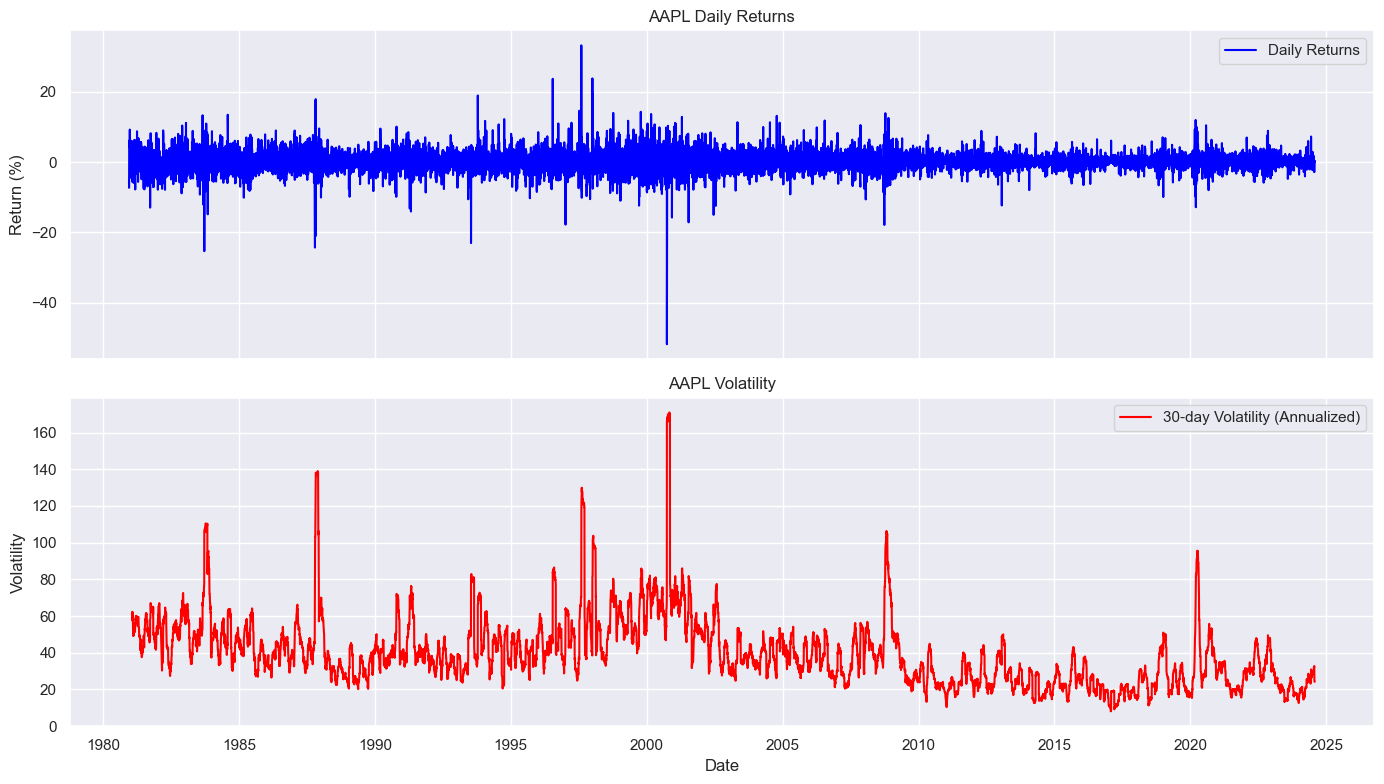

Generating financial metrics plots for AMZN


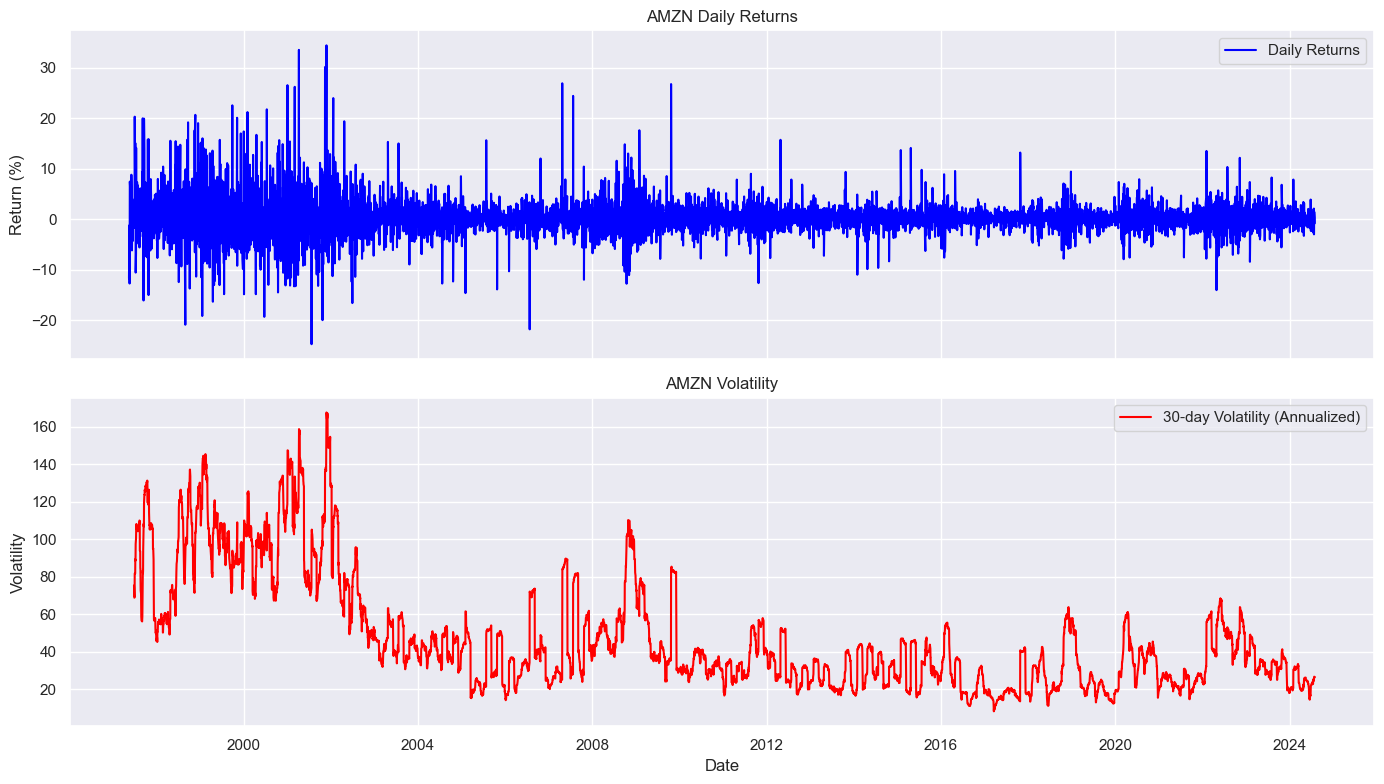

Generating financial metrics plots for GOOG


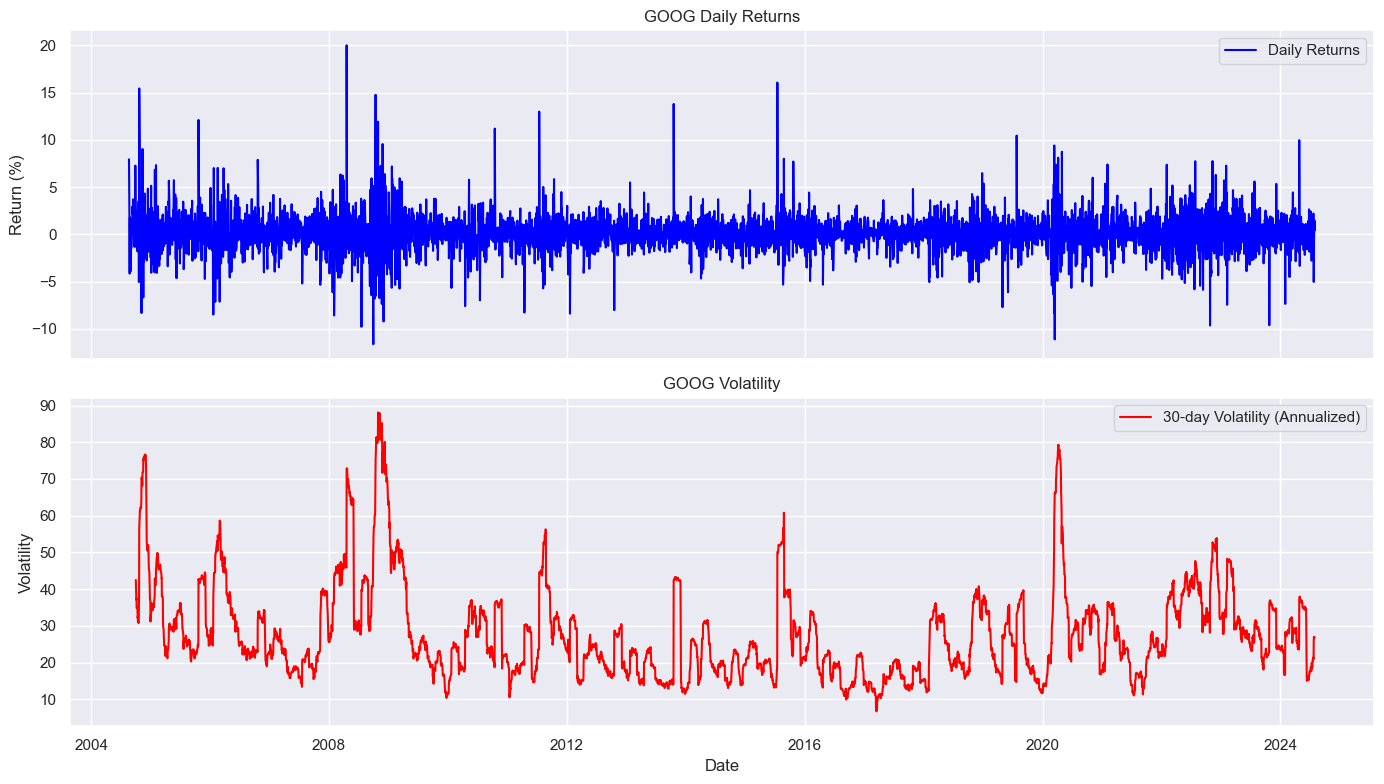

Generating financial metrics plots for META


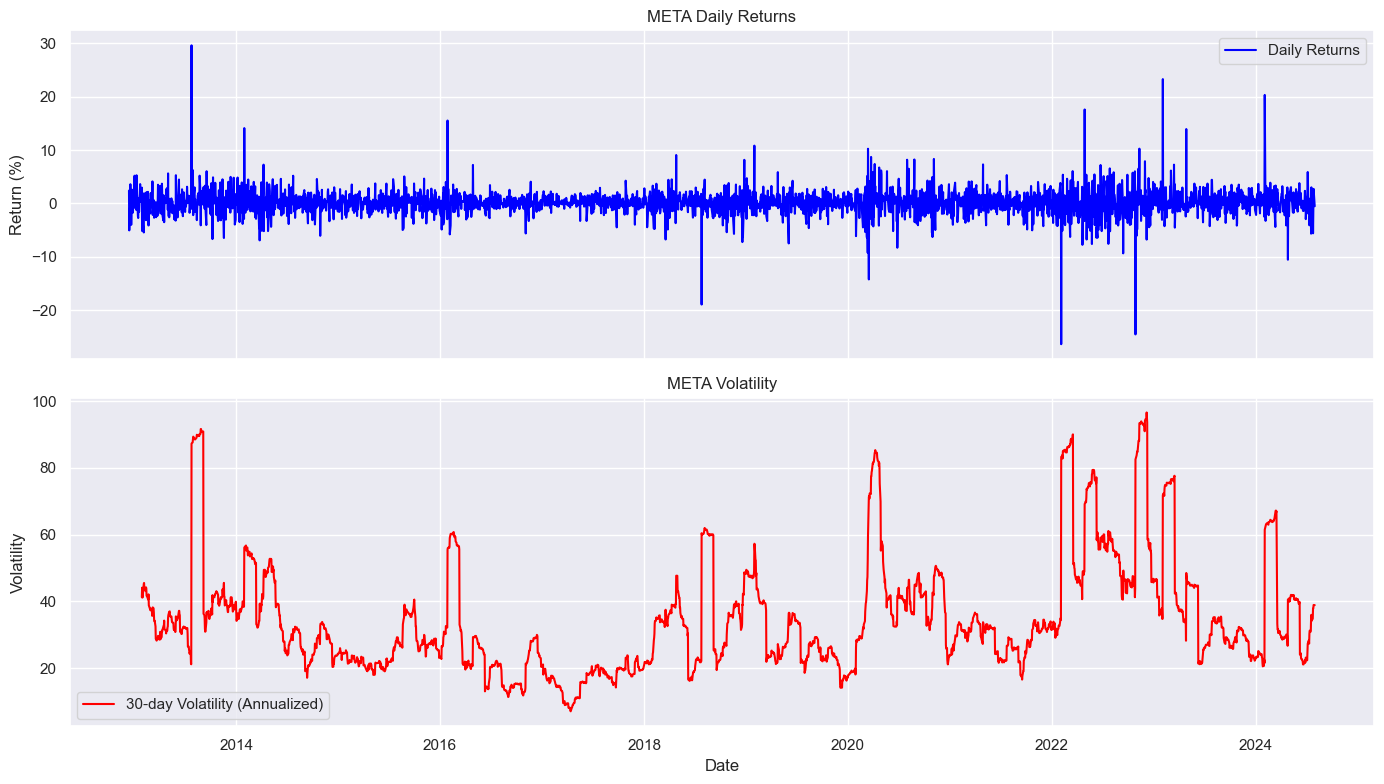

Generating financial metrics plots for MSFT


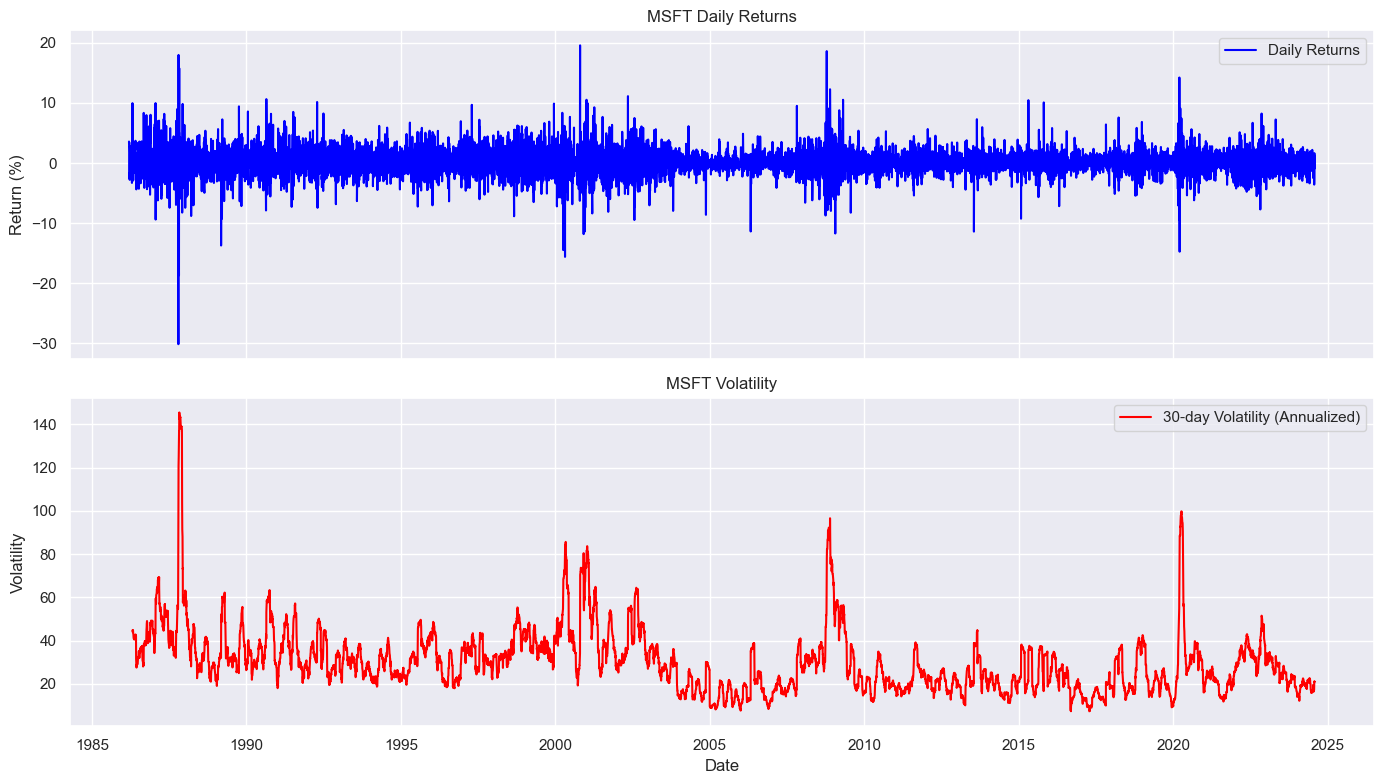

Generating financial metrics plots for NVDA


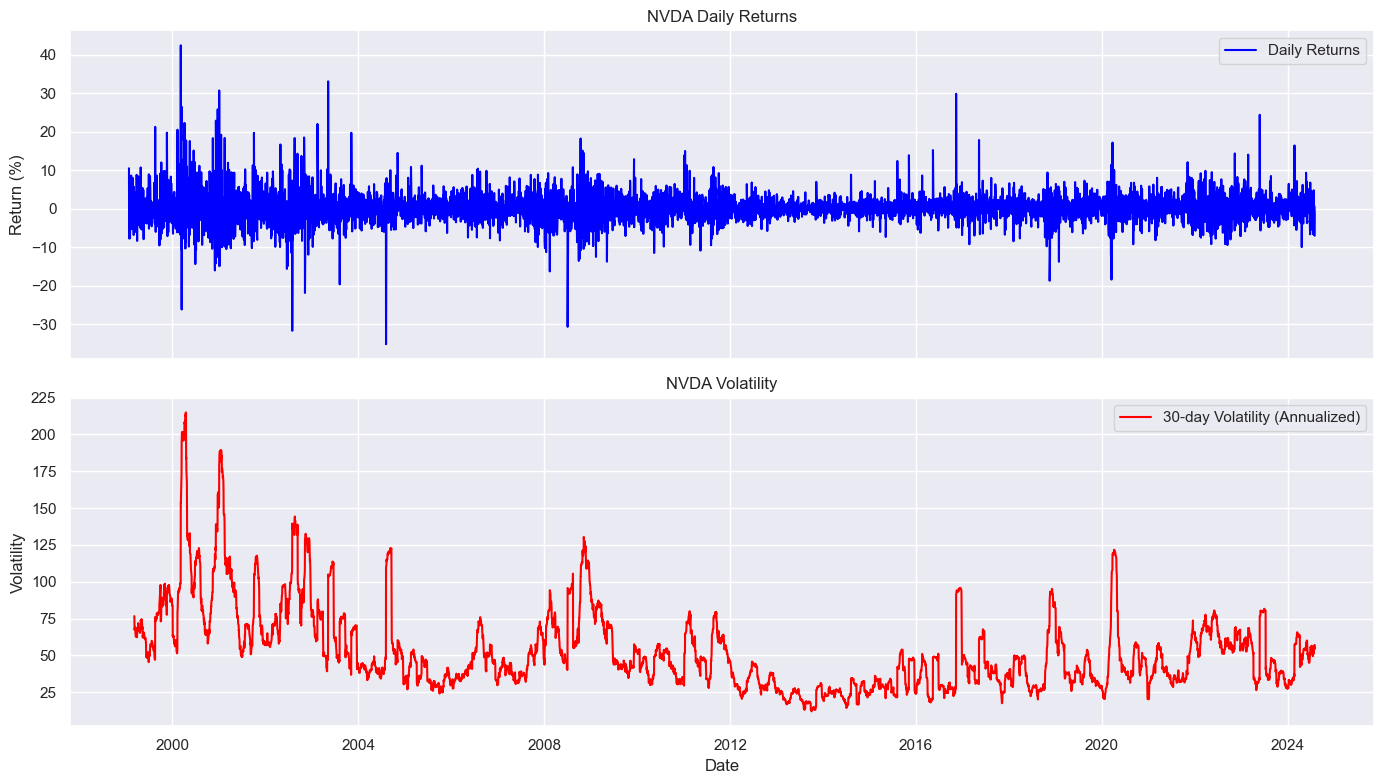

Generating financial metrics plots for TSLA


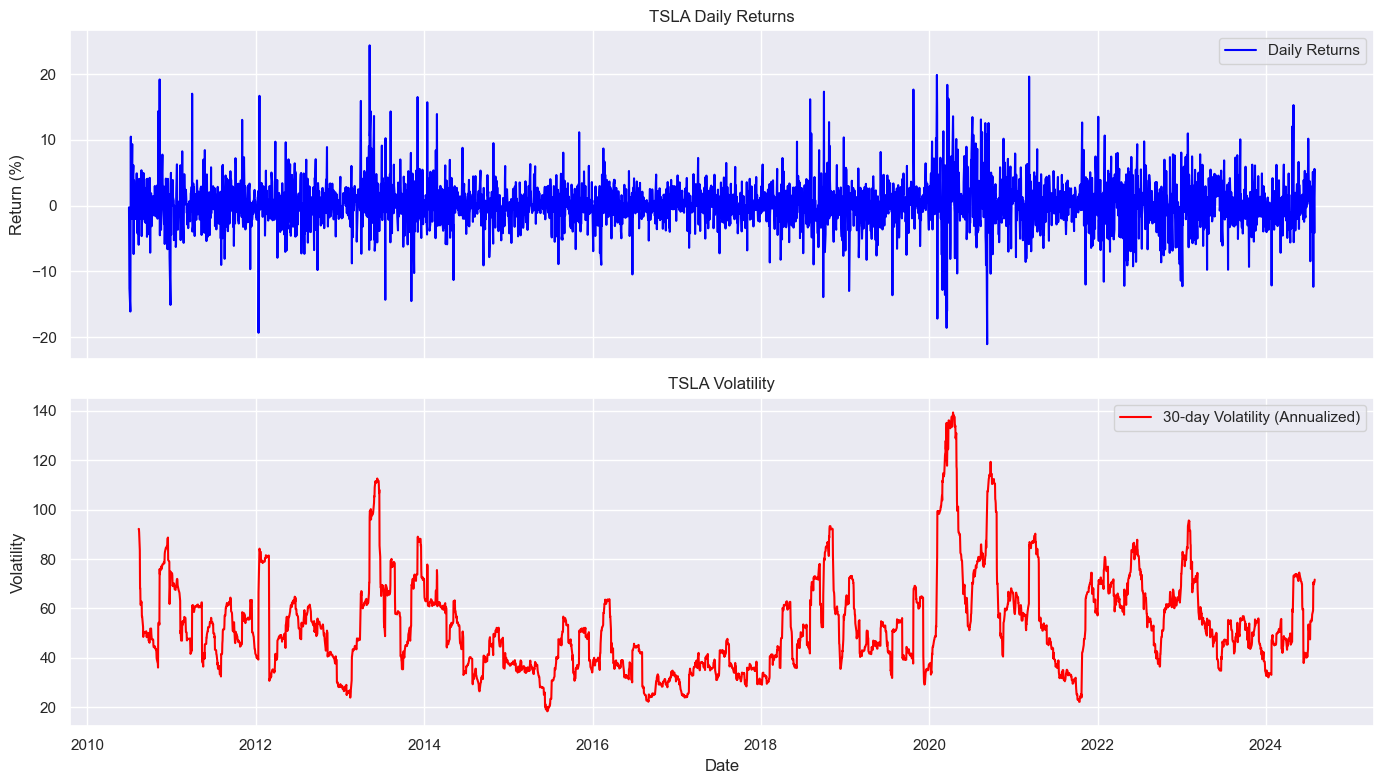

In [56]:
# Cell 8: Visualize Financial Metrics (All Stocks)
def plot_financial_metrics(symbol, df):
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 8), sharex=True)
    
    # Plot Daily Returns
    ax1.plot(df.index, df['Daily_Return'], label='Daily Returns', color='blue')
    ax1.set_title(f'{symbol} Daily Returns')
    ax1.set_ylabel('Return (%)')
    ax1.legend()
    ax1.grid(True)
    
    # Plot Volatility
    ax2.plot(df.index, df['Volatility'], label='30-day Volatility (Annualized)', color='red')
    ax2.set_title(f'{symbol} Volatility')
    ax2.set_ylabel('Volatility')
    ax2.legend()
    ax2.grid(True)
    
    plt.xlabel('Date')
    plt.tight_layout()
    plt.savefig(ASSETS_DIR / f'{symbol}_financial_metrics.png')
    plt.show()

# Plot for all stocks
for symbol in stock_data:
    print(f"Generating financial metrics plots for {symbol}")
    plot_financial_metrics(symbol, stock_data[symbol])

In [58]:
# Cell 9: Save DataFrames
# Save processed DataFrames
for symbol, df in stock_data.items():
    output_path = DATA_DIR / f'{symbol}_processed_data.csv'
    df.to_csv(output_path)
    print(f"Saved processed data for {symbol} to {output_path}")

Saved processed data for AAPL to C:\Users\yusuf\Desktop\10Academy\week_1\data\AAPL_processed_data.csv
Saved processed data for AMZN to C:\Users\yusuf\Desktop\10Academy\week_1\data\AMZN_processed_data.csv
Saved processed data for GOOG to C:\Users\yusuf\Desktop\10Academy\week_1\data\GOOG_processed_data.csv
Saved processed data for META to C:\Users\yusuf\Desktop\10Academy\week_1\data\META_processed_data.csv
Saved processed data for MSFT to C:\Users\yusuf\Desktop\10Academy\week_1\data\MSFT_processed_data.csv
Saved processed data for NVDA to C:\Users\yusuf\Desktop\10Academy\week_1\data\NVDA_processed_data.csv
Saved processed data for TSLA to C:\Users\yusuf\Desktop\10Academy\week_1\data\TSLA_processed_data.csv


In [19]:
# Cell 10: Git Operations for Task 2
# Save notebook manually (Ctrl+S) before running this cell

import os
from pathlib import Path
import subprocess

# Set up paths
BASE_DIR = Path(r'C:\Users\yusuf\Desktop\10Academy\week_1\Predicting-Stock-Price')
ASSETS_DIR = BASE_DIR / 'assets' / 'task2'
TASK1_ASSETS_DIR = BASE_DIR / 'assets' / 'task1'
TASK2_NOTEBOOK = BASE_DIR / 'notebooks' / 'task2' / 'task2_quantitative_analysis.ipynb'
TASK1_NOTEBOOK = BASE_DIR / 'notebooks' / 'task1' / 'task1_eda.ipynb'

# Change to project directory
os.chdir(BASE_DIR)
print(f"Changed working directory to: {BASE_DIR}")

# Files to add
files_to_add = [
    '.vscode/settings.json',
    '.github/workflows/unittests.yml',
    '.gitignore',
    'requirements.txt',
    'README.md',
    'src/__init__.py',
    'notebooks/__init__.py',
    'notebooks/README.md',
    str(TASK2_NOTEBOOK.relative_to(BASE_DIR)),
    'tests/__init__.py',
    'scripts/__init__.py',
    'scripts/README.md'
]

# Verify files
print("Verifying files to commit:")
missing_files = []
for f in files_to_add:
    if not (BASE_DIR / f).exists():
        print(f"❌ Missing: {f}")
        missing_files.append(f)
    else:
        print(f"✅ Found: {f}")

# Verify PNGs
task2_pngs = list(ASSETS_DIR.glob('*.png'))
task1_pngs = list(TASK1_ASSETS_DIR.glob('*.png'))

if not task2_pngs:
    print("⚠️ No Task 2 PNG files found.")
if not task1_pngs:
    print("⚠️ No Task 1 PNG files found.")

# Git setup
if not (BASE_DIR / '.git').exists():
    subprocess.run(['git', 'init'], check=True)
    subprocess.run(['git', 'config', 'user.name', 'yesufma'], check=True)
    subprocess.run(['git', 'config', 'user.email', 'yesufmt@gmail.com'], check=True)
    print("✅ Initialized new Git repo")

# Set remote
REMOTE_URL = "https://github.com/yesufma/Predicting-Stock-Price.git"
remote_output = subprocess.run(['git', 'remote', '-v'], capture_output=True, text=True)
if 'origin' not in remote_output.stdout:
    subprocess.run(['git', 'remote', 'add', 'origin', REMOTE_URL], check=True)
    print(f"✅ Remote origin set to {REMOTE_URL}")
else:
    subprocess.run(['git', 'remote', 'set-url', 'origin', REMOTE_URL], check=True)
    print(f"🔄 Remote origin updated to {REMOTE_URL}")

# Sync branches
subprocess.run(['git', 'fetch', 'origin'])
subprocess.run(['git', 'checkout', '-B', 'main'])
subprocess.run(['git', 'pull', 'origin', 'main'], stderr=subprocess.DEVNULL)
subprocess.run(['git', 'checkout', '-B', 'task-1'])
subprocess.run(['git', 'pull', 'origin', 'task-1'], stderr=subprocess.DEVNULL)
subprocess.run(['git', 'checkout', '-B', 'task-2'])

# Add files
for f in files_to_add:
    subprocess.run(['git', 'add', f])

# Add task PNGs
if task2_pngs:
    subprocess.run(['git', 'add', 'assets/task2/*.png'], shell=True)
if task1_pngs:
    subprocess.run(['git', 'add', 'assets/task1/*.png'], shell=True)

# Add Task 1 notebook if it exists
if TASK1_NOTEBOOK.exists():
    subprocess.run(['git', 'add', str(TASK1_NOTEBOOK.relative_to(BASE_DIR))])
    print("✅ Added Task 1 notebook")

# Commit
subprocess.run(['git', 'commit', '-m', 'Completed Task 2: Quantitative analysis with TA-Lib and financial metrics'], stderr=subprocess.DEVNULL)

# Push task-2
token = os.getenv('GITHUB_TOKEN') or "ghp_YOUR_NEW_TOKEN"
repo = "yesufma/Predicting-Stock-Price"
push_url = f"https://{token}@github.com/{repo}.git"
subprocess.run(['git', 'push', push_url, 'task-2', '--force'])

# Rebase task-1 and push
subprocess.run(['git', 'checkout', 'task-1'])
subprocess.run(['git', 'rebase', 'main'], stderr=subprocess.DEVNULL)
subprocess.run(['git', 'push', push_url, 'task-1', '--force'])

# Merge task-1 to main and push
subprocess.run(['git', 'checkout', 'main'])
subprocess.run(['git', 'merge', 'task-1', '--no-ff'], stderr=subprocess.DEVNULL)
subprocess.run(['git', 'push', push_url, 'main'])

# Switch back to task-2
subprocess.run(['git', 'checkout', 'task-2'])

print("✅ Task 2 pushed")
print("✅ Task 1 rebased and merged into main")
print("👉 Create PR for Task 1: https://github.com/yesufma/Predicting-Stock-Price/compare/main...task-1")
print("👉 Create PR for Task 2: https://github.com/yesufma/Predicting-Stock-Price/compare/main...task-2")


Changed working directory to: C:\Users\yusuf\Desktop\10Academy\week_1\Predicting-Stock-Price
Verifying files to commit:
✅ Found: .vscode/settings.json
✅ Found: .github/workflows/unittests.yml
✅ Found: .gitignore
✅ Found: requirements.txt
✅ Found: README.md
✅ Found: src/__init__.py
✅ Found: notebooks/__init__.py
✅ Found: notebooks/README.md
✅ Found: notebooks\task2\task2_quantitative_analysis.ipynb
✅ Found: tests/__init__.py
✅ Found: scripts/__init__.py
✅ Found: scripts/README.md
⚠️ No Task 1 PNG files found.
🔄 Remote origin updated to https://github.com/yesufma/Predicting-Stock-Price.git
✅ Task 2 pushed
✅ Task 1 rebased and merged into main
👉 Create PR for Task 1: https://github.com/yesufma/Predicting-Stock-Price/compare/main...task-1
👉 Create PR for Task 2: https://github.com/yesufma/Predicting-Stock-Price/compare/main...task-2
